In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# use to display plots in ipython notebook
%matplotlib inline

## Read in Data
### Path is set so that the csv file is in the same directory as the ipython notebook file

In [3]:
cacao = pd.read_csv('flavors_of_cacao.csv')

In [4]:
cacao.columns = ['Company', 'SpecificOrigin_BarName','REF','ReviewDate','CocoaPerc','CompLoc','Rating','BeanType','BroadBeanOrigin']

In [5]:
cacao.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [12]:
sort_rating = cacao.sort_values(by = 'Rating', ascending = False)
sort_rating.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
78,Amedei,Chuao,111,2007,70%,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,70%,Italy,5.0,Blend,
719,Fruition,"Coto Brus, Heirloom, Batch 1",1780,2016,74%,U.S.A.,4.0,Amazon mix,Costa Rica
1273,Patric,Madagascar,331,2009,75%,U.S.A.,4.0,Trinitario,Madagascar
222,Bonnat,Kaori,1339,2014,75%,France,4.0,,Brazil


In [14]:
sort_percent = cacao.sort_values(by = 'CocoaPerc')
sort_percent.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
557,Domori,"IL100, H. San Jose",1109,2013,100%,Italy,3.00,Criollo,Venezuela
835,Hotel Chocolat (Coppeneur),"Los Rios, H. Iara, 2012, 120hr c.",1113,2013,100%,U.K.,2.50,Forastero (Nacional),Ecuador
1204,Ocho,Sang Yum Coop,1760,2016,100%,New Zealand,2.75,,Samoa
836,Hotel Chocolat (Coppeneur),"Conacado, 2012, 120hr c.",1113,2013,100%,U.K.,2.75,,Dominican Republic
834,Hotel Chocolat (Coppeneur),"Chanchamayo, Pichanadi, 2012, 60hr c.",1109,2013,100%,U.K.,2.75,,Peru


## Find the max rating from each company

In [16]:
maxCompRating = cacao.groupby('Company')['Rating'].max()
maxCompRating = maxCompRating.sort_values(ascending = False)
maxCompRating.head()

Company
Amedei      5.0
A. Morin    4.0
Danta       4.0
Durci       4.0
Ritual      4.0
Name: Rating, dtype: float64

(array([   4.,   13.,   32.,  141.,  259.,  644.,  602.,   98.,    0.,    2.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

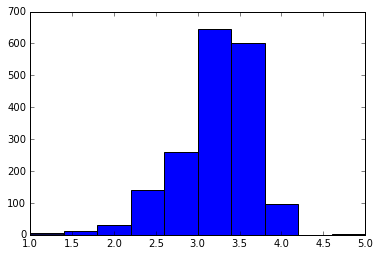

In [30]:
# histograms of ratings
plt.hist(cacao[cacao.columns[6]])


In [57]:
# Count of how many chocolate bars are from each company
company_count = cacao.groupby('Company').Company.count()
company_count = company_count.sort_values(ascending = False)
company_count.head()

Company
Soma        47
Bonnat      27
Fresco      26
Pralus      25
A. Morin    23
Name: Company, dtype: int64

In [56]:
# mean rating for each company
cacao.pivot_table('Rating', columns = 'Company', aggfunc = np.mean)

Company
A. Morin                            3.380435
AMMA                                3.500000
Acalli                              3.750000
Adi                                 3.250000
Aequare (Gianduja)                  2.875000
Ah Cacao                            3.000000
Akesson's (Pralus)                  3.083333
Alain Ducasse                       2.700000
Alexandre                           3.500000
Altus aka Cao Artisan               2.850000
Amano                               3.416667
Amatller (Simon Coll)               2.875000
Amazona                             3.375000
Ambrosia                            3.250000
Amedei                              3.846154
Anahata                             3.000000
Animas                              3.500000
Ara                                 2.812500
Arete                               3.534091
Artisan du Chocolat                 3.078125
Artisan du Chocolat (Casa Luker)    2.750000
Askinosie                           3.416667
Ba

In [48]:
# max rating from each broad bean origin location
bbo = cacao.groupby('BroadBeanOrigin')['Rating'].max()
bbo.head()

BroadBeanOrigin
Africa, Carribean, C. Am.    2.75
Australia                    3.75
Belize                       4.00
Bolivia                      4.00
Brazil                       4.00
Name: Rating, dtype: float64